In [1]:
import pandas as pd

In [5]:
train_df = pd.read_csv('C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/Data/trainWithoutNegative.csv', sep='\t', encoding="utf-8")
encoded_df = pd.read_csv('C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/Data/encoded_df.csv', sep='\t', encoding="utf-8")

In [6]:
path = "C:/Users/Tiam Tee/Documents/Spotify100M_data_project/Models/DIMSUM results/time_v_similarity.txt"

In [8]:
with open(path, 'r') as file:
    lines = file.readlines()
lines
# for line in lines:
#     print(line.strip())

['master node: 16 vcpus and worker nodes: 2*8vcpus \n',
 'time consumed when similarity = 0.1: 1431.7258877754211\n',
 'time consumed when similarity = 0.2: 1656.5868866443634\n',
 'time consumed when similarity = 0.3: 1092.666567325592\n',
 'time consumed when similarity = 0.4: 1053.6226177215576\n',
 'time consumed when similarity = 0.5: 1005.7532210350037\n',
 'time consumed when similarity = 0.6: 969.7162618637085\n',
 'time consumed when similarity = 0.7: 867.6771032810211\n',
 '\n',
 'master node: 16 vcpus and worker nodes: 3*8vcpus\n',
 'time consumed when 3 nodes and similarity = 0.1: 2086.089996576309\n',
 'time consumed when 3 nodes and similarity = 0.2: 1775.274890422821\n',
 'time consumed when 3 nodes and similarity = 0.3: 1314.4483664035797\n',
 'time consumed when 3 nodes and similarity = 0.4: 1114.7282025814056\n',
 'time consumed when 3 nodes and similarity = 0.5: 1033.1562402248383\n',
 '\n',
 'master node: 16 vcpus and worker nodes: 4*8vcpus \n',
 'time consumed when

In [12]:
config_data = []
current_config = []

for line in lines:
    if line.strip() and 'master node' not in line:
        key, value = line.strip().split(':')
        current_config.append((key.strip(), float(value.strip())))
    elif 'master node' in line or not line.strip():
        if current_config:
            config_data.append(current_config)
            current_config = []

config_data.append(current_config)  # Append the last configuration

dataframes = []

for config in config_data:
    df = pd.DataFrame(config, columns=['Configuration', 'Time'])
    dataframes.append(df)

In [10]:
config_data

[[('time consumed when similarity = 0.1', 1431.7258877754211),
  ('time consumed when similarity = 0.2', 1656.5868866443634),
  ('time consumed when similarity = 0.3', 1092.666567325592),
  ('time consumed when similarity = 0.4', 1053.6226177215576),
  ('time consumed when similarity = 0.5', 1005.7532210350037),
  ('time consumed when similarity = 0.6', 969.7162618637085),
  ('time consumed when similarity = 0.7', 867.6771032810211)],
 [('time consumed when 3 nodes and similarity = 0.1', 2086.089996576309),
  ('time consumed when 3 nodes and similarity = 0.2', 1775.274890422821),
  ('time consumed when 3 nodes and similarity = 0.3', 1314.4483664035797),
  ('time consumed when 3 nodes and similarity = 0.4', 1114.7282025814056),
  ('time consumed when 3 nodes and similarity = 0.5', 1033.1562402248383)],
 [('time consumed when 4 nodes and similarity = 0.1', 669.1193559169769),
  ('time consumed when 4 nodes and similarity = 0.2', 615.0761647224426),
  ('time consumed when 4 nodes and simi

In [15]:
list_ = []
for i in config_data:
    similarities, times = [], []
    for j in i:
        caption, time = j
        _ , similarity = caption.split(' = ')
        similarities.append(float(similarity))
        times.append(time)
    list_.append(similarities)
    list_.append(times)

In [18]:
list_

[[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
 [1431.7258877754211,
  1656.5868866443634,
  1092.666567325592,
  1053.6226177215576,
  1005.7532210350037,
  969.7162618637085,
  867.6771032810211],
 [0.1, 0.2, 0.3, 0.4, 0.5],
 [2086.089996576309,
  1775.274890422821,
  1314.4483664035797,
  1114.7282025814056,
  1033.1562402248383],
 [0.1, 0.2, 0.3, 0.4, 0.5],
 [669.1193559169769,
  615.0761647224426,
  584.3689029216766,
  578.1778109073639,
  560.797253370285],
 [0.5, 0.6, 0.7],
 [7110.835877418518, 3237.6547009944916, 2339.5822174549103]]

In [29]:
data1 = {'similarity': list_[0][0:5], 'time1': list_[1][0:5]}
data2 = {'similarity': list_[2], 'time2': list_[3]}
data3 = {'similarity': list_[4], 'time3': list_[5]}
data4 = {'similarity': list_[0][4:], 'time4': list_[1][4:]}
data5 = {'similarity': list_[6], 'time5': list_[7]}

In [56]:
frame1 = pd.DataFrame(data1)
frame2 = pd.DataFrame(data2)
frame3 = pd.DataFrame(data3)
frame4 = pd.DataFrame(data4)
frame5 = pd.DataFrame(data5)

# frame = frame1.join(frame2, on='similarity')
frame = pd.merge(frame1, frame2, on='similarity')
frame = pd.merge(frame, frame3, on='similarity')
# .join(frame3, on='similarity')
frame

fframe = pd.merge(frame4, frame5, on='similarity')
fframe

,similarity,time4,time5
0,0.5,1005.753221,7110.835877
1,0.6,969.716262,3237.654701
2,0.7,867.677103,2339.582217


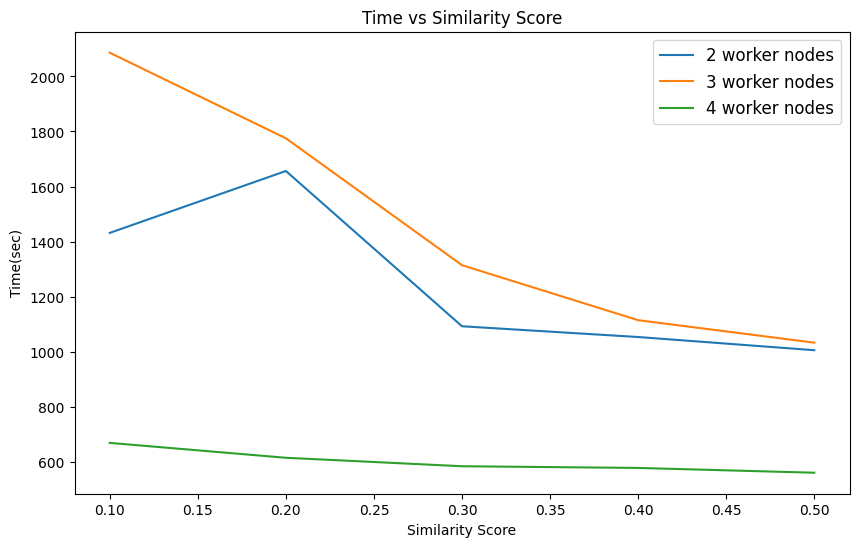

In [46]:
import matplotlib.pyplot as plt
frame.set_index('similarity', inplace=True)

# plot the lines for each column
frame.plot(figsize=(10,6))

# set the title and labels for x and y axis
plt.title('Time vs Similarity Score')
plt.xlabel('Similarity Score')
plt.ylabel('Time(sec)')
plt.legend(['2 worker nodes', '3 worker nodes', '4 worker nodes'], loc='upper right', fontsize=12)
# show the plot
plt.show()

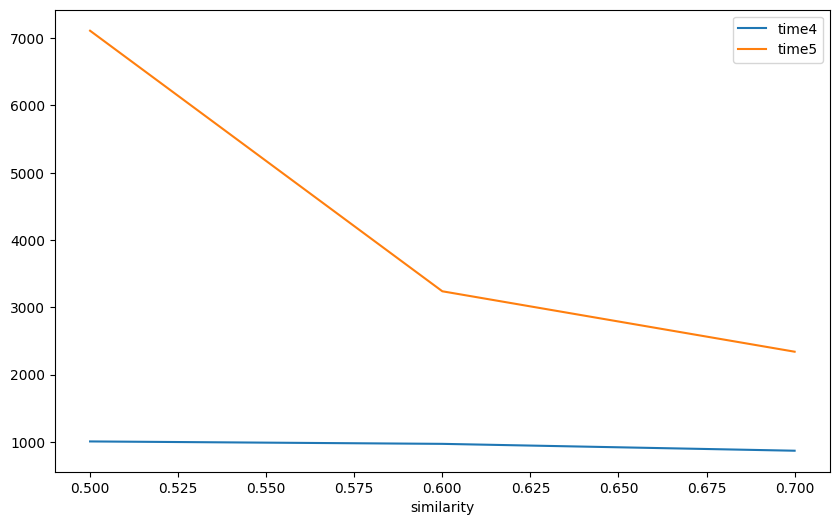

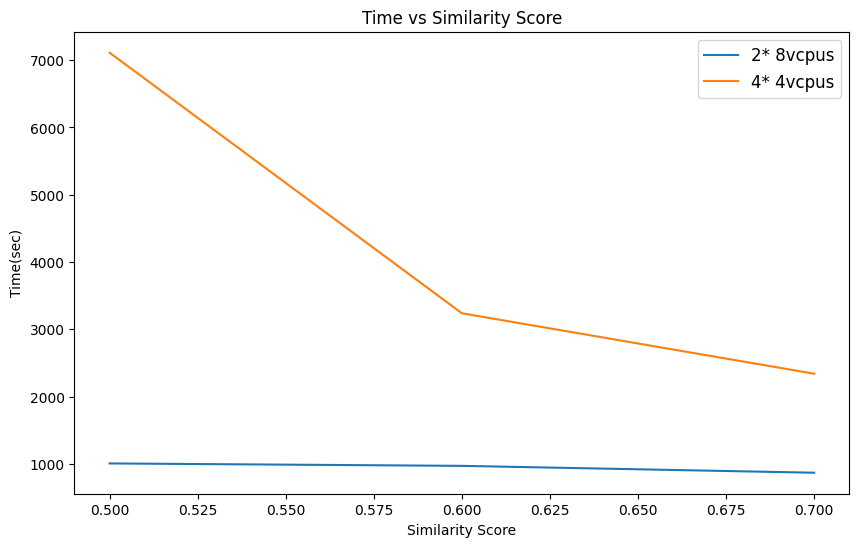

In [57]:
fframe.set_index('similarity', inplace=True)

# plot the lines for each column
fframe.plot(figsize=(10,6))
ax = fframe.plot(figsize=(10,6))
# set the title and labels for x and y axis
plt.title('Time vs Similarity Score')
plt.xlabel('Similarity Score')
plt.ylabel('Time(sec)')
plt.legend(['2* 8vcpus', '4* 4vcpus'], loc='upper right', fontsize=12)
# ax.set(yscale="symlog", ylim=[0, 1000], linthresh=1000)
# show the plot
plt.show()